# Informe técnico: Análisis de datos de Starcraft_Duoc

## 1. Business Understanding

### Objetivos clave

- **Objetivo General**: Identificar factores que influyen en el rendimiento de los jugadores para optimizar estrategias de entrenamiento y mejorar la experiencia competitiva.
- **Objetivos específicos**:
  1. Determinar cómo variables como APM, edad y horas de juego afectan el nivel de liga (LeagueIndex).
  2. Identificar patrones de comportamiento en jugadores profesionales vs. novatos.
  3. Proponer recomendaciones basadas en datos para mejorar el matchmaking o programas de entrenamiento.

### KPIs relevantes

1. APM (acciones por minuto): Indicador directo de la destreza mecánica.
2. Horas por semana (HoursPerWeek): Relación entre dedicación y nivel competitivo.
3. Tasa de victoria: Derivada implícitamente de LeagueIndex (ligas mas altas sugieren mayor éxito)
4. Consistencia en ActionLatency: Tiempo de reacción para medir eficiencia.
---
## 2. Data Understanding

### Carga y exploración inicial

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar datos

df = pd.read_csv("/content/starcraft_duoc.csv", delimiter=";");
print(df.head())

   GameID  LeagueIndex   Age  HoursPerWeek  TotalHours        APM  \
0      52            5  27.0          10.0      3000.0    143.718   
1      55            5  23.0          10.0      5000.0  1.292.322   
2      56            4  30.0          10.0       200.0    699.612   
3      57            3  19.0          20.0       400.0  1.076.016   
4      58            3  32.0          10.0       500.0  1.228.908   

  SelectByHotkeys AssignToHotkeys MinimapAttacks MinimapRightClicks  \
0     0.003515159     0.000219697    0.000109849        0.000392317   
1     0.003303812     0.000259462    0.000294057        0.000432436   
2     0.001101091      0.00033557    0.000293624        0.000461409   
3     0.001033542     0.000213101       5.33e-05        0.000543409   
4     0.001136014     0.000327326              0        0.001328558   

   NumberOfPACs GapBetweenPACs ActionLatency  ActionsInPAC  TotalMapExplored  \
0      0.004849        326.677       408.673        47.508          0.000220  

In [5]:
#Veremos la información de cada dato (su tipo, si son nulos, su columna etc)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   object 
 6   SelectByHotkeys     3395 non-null   object 
 7   AssignToHotkeys     3395 non-null   object 
 8   MinimapAttacks      3395 non-null   object 
 9   MinimapRightClicks  3395 non-null   object 
 10  NumberOfPACs        3395 non-null   float64
 11  GapBetweenPACs      3395 non-null   object 
 12  ActionLatency       3395 non-null   object 
 13  ActionsInPAC        3395 non-null   float64
 14  TotalMapExplored    3395 non-null   float64
 15  WorkersMade         3395 non-null   object 
 16  Unique

## Análisis con df.info()

- **Valores nulos**: Como se puede apreciar detectamos que el total de entradas de datos son 3395, sin embargo, **AGE** tiene 3340 No nulas, implicando que hayan valores nulos, esto también se puede apreciar en **HoursPerWeek y TotalHours**
- **Tipos de datos**: Confirmamos que variables númericas como `APM`, `SelectByHotkeys` y `ActionLatencia` estan mal clasificadas como object, haciendo que haya problemas de formato.

In [6]:
print(df.describe())

             GameID  LeagueIndex          Age  HoursPerWeek      TotalHours  \
count   3395.000000  3395.000000  3340.000000   3339.000000     3338.000000   
mean    4805.012371     4.184094    21.647904     15.910752      960.421809   
std     2719.944851     1.517327     4.206341     11.962912    17318.133922   
min       52.000000     1.000000    16.000000      0.000000        3.000000   
25%     2464.500000     3.000000    19.000000      8.000000      300.000000   
50%     4874.000000     4.000000    21.000000     12.000000      500.000000   
75%     7108.500000     5.000000    24.000000     20.000000      800.000000   
max    10095.000000     8.000000    44.000000    168.000000  1000000.000000   

       NumberOfPACs  ActionsInPAC  TotalMapExplored   MaxTimeStamp  
count   3395.000000   3395.000000       3395.000000    3395.000000  
mean       0.003463     47.216492          0.000283   83598.229161  
std        0.000992     20.604812          0.000087   33497.667966  
min        0

## Analisis de df.describe()

- **Edad promedio**: ~21.6 años, indicando una base de jugadores jóvenes.
- **Horas por semana**: Media de ~15.9 horas, con outliers extremos (ej. máximo de 168 horas, posible error).
- **TotalHours**: Media de ~960 horas, pero con un valor máximo de 1,000,000 (claramente erróneo, señal de datos sucios).
- **APM**: Valores como 1.292.322 (posible confusión entre separadores decimales y de miles).

In [7]:
print(df.describe().transpose())


                   count          mean           std           min  \
GameID            3395.0   4805.012371   2719.944851     52.000000   
LeagueIndex       3395.0      4.184094      1.517327      1.000000   
Age               3340.0     21.647904      4.206341     16.000000   
HoursPerWeek      3339.0     15.910752     11.962912      0.000000   
TotalHours        3338.0    960.421809  17318.133922      3.000000   
NumberOfPACs      3395.0      0.003463      0.000992      0.000679   
ActionsInPAC      3395.0     47.216492     20.604812      2.454000   
TotalMapExplored  3395.0      0.000283      0.000087      0.000091   
MaxTimeStamp      3395.0  83598.229161  33497.667966  25224.000000   

                           25%           50%            75%             max  
GameID             2464.500000   4874.000000    7108.500000    10095.000000  
LeagueIndex           3.000000      4.000000       5.000000        8.000000  
Age                  19.000000     21.000000      24.000000      

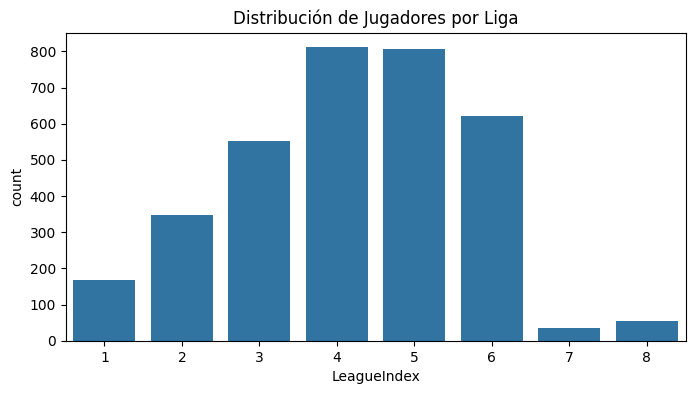

In [8]:
# Distribución de LeagueIndex
plt.figure(figsize=(8, 4))
sns.countplot(x='LeagueIndex', data=df)
plt.title("Distribución de Jugadores por Liga")
plt.show()

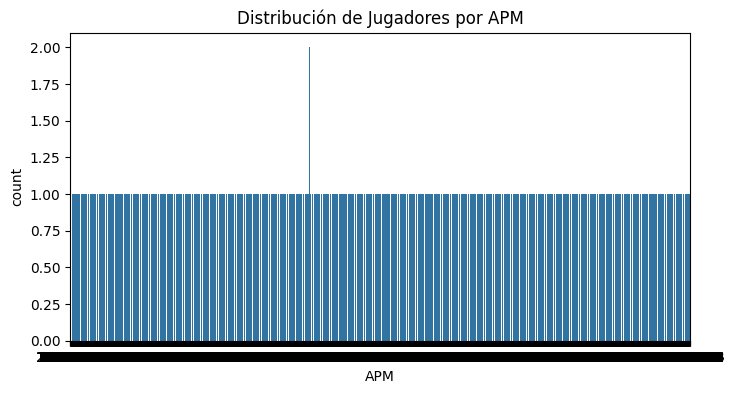

In [9]:
# Intentaremos mostrar un grafico parecido con APM
plt.figure(figsize=(8, 4))
sns.countplot(x='APM', data=df)
plt.title("Distribución de Jugadores por APM")
plt.show()

In [10]:
print(df.isnull().sum())

GameID                 0
LeagueIndex            0
Age                   55
HoursPerWeek          56
TotalHours            57
APM                    0
SelectByHotkeys        0
AssignToHotkeys        0
MinimapAttacks         0
MinimapRightClicks     0
NumberOfPACs           0
GapBetweenPACs         0
ActionLatency          0
ActionsInPAC           0
TotalMapExplored       0
WorkersMade            0
UniqueUnitsMade        0
ComplexUnitsMade       0
ComplexAbilityUsed     0
MaxTimeStamp           0
dtype: int64


## Observaciones

Con esta visualización gráfica podemos darnos cuenta que la mayoria de jugadores estan en rangos de liga intermedios (4-5) Siendo platino el rango con más jugadores. Esto implica que la mayoría de jugadores probablemente ya sean experimentados y lleven ya tiempo de juego. También se puede apreciar que el rango con menos jugadores es Grandmaster, lo que sugiere una curva de aprendizaje alta.

En el segundo gráfico obtuvimos un problema respecto al gráfico ¿Por qué? Esto es debido a que Pandas (pd) interpreto los datos de APM (Ejemplo: 1.292.322) como un objeto debido a que los datos estan como puntos. Entonces este grafico no nos puede decir nada AUN, intentaremos convertirlos datos numericos.

Detectamos también además gracias a la descripción y la info del dataset, variables muy importantes como : **Age, HoursPerWeek, APM y LeagueIndex**

# Insight Relevantes

- Edad (Age):
  - Media: 21.6 años (promedio de jugadores jovenes)
  - Outliers: Jugadores mayores de 40 años (posible ruido, aunque es justificado debido a la antiguedad del juego)
  - Insight: La mayoría son jóvenes, pero se debe validar si la edad impacta en el rendimiento.
- Horas por semana (HoursPerWeek):
  - Media: 15.9 horas
  - Outliers: Máximo de 168 horas (posible error, literalmente es la cantidad de horas que tiene una semana)
  - Insight: Jugadores casuales vs. profesionales (ej: >20 horas/semana).

- APM:
  - **PROBLEMA**: datos mal formateados pandas lo interpreto como objeto
  - Insight: Corregir formato para análisis cuantitativo.
- TotalHours:
  - Media: 960 horas.
  - Outliers: Máximo de 1,000,000 de horas (¿error de registro?)
- Liga:
  -Distribución modal en ligas 4-5 (Platino/Diamond)
  -Grandmaster (Liga 7) tiene menos jugadores, sugiriendo una competitividad alta en el juego

### Valores perdidos y Atípicos

- Valores nulos:
  - Age (55), HourPerWeek(56), TotalHours(57)
  - Propuesta de limpieza, imputar con mediana o eliminar registros según contexto
- Outliers:
  -TotalHours y HoursPerWeek con valores irregistrables (?)

**Matriz de correlación**
Variables claves a correlacionar:
 **LeagueIndex vs APM** , HoursPerWeek, Age, ActionLatency.

---

### Corrección formato APM y Manejo de valores nulos


In [24]:
# Convertir APM a numérico (remover puntos y convertir a float), tambien lo haremos con actionLatency
df['APM'] = df['APM'].str.replace('.', '').astype(float)
df['ActionLatency'] = df['ActionLatency'].str.replace('.','').astype(float)
print(df['APM'], df['ActionLatency'])

0        143718.0
1       1292322.0
2        699612.0
3       1076016.0
4       1228908.0
          ...    
3390    2596296.0
3391      31467.0
3392    2994282.0
3393    3758664.0
3394    3483576.0
Name: APM, Length: 3395, dtype: float64 0       408673.0
1       423454.0
2       753548.0
3       537352.0
4       620813.0
          ...   
3390    428342.0
3391    361156.0
3392    395156.0
3393    348547.0
3394    335142.0
Name: ActionLatency, Length: 3395, dtype: float64


In [ ]:
# Imputar valores nulos con la mediana 
df['Age'].fillna(df['Age'].median(), inplace=True)
df['HoursPerWeek'].fillna(df['HoursPerWeek'].median(), inplace=True)
df['TotalHours'].fillna(df['TotalHours'].median(), inplace=True)

<ipython-input-25-e5aa93d5ad00>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-25-e5aa93d5ad00>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [26]:
# Filtrar valores imposibles (ej: 1,000,000 horas ≈ 114 años)
df = df[df['TotalHours'] < 100000]  # Ajustar según contexto
df = df[df['HoursPerWeek'] <= 168]  # Máximo teórico

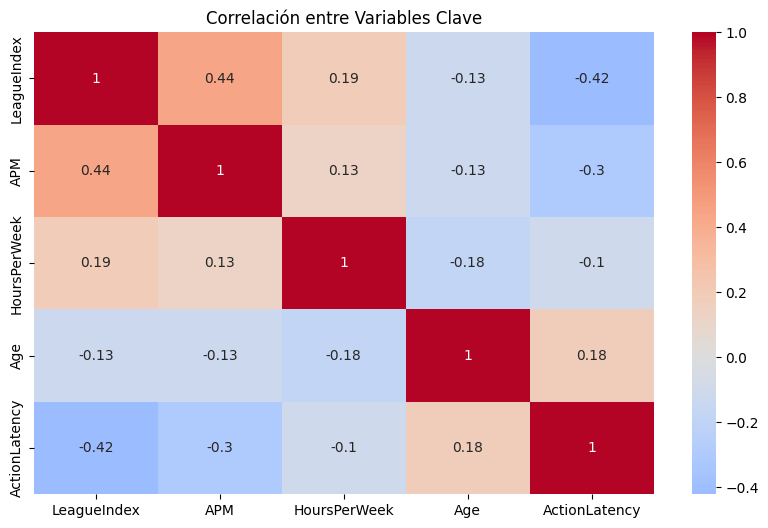

In [27]:
# Seleccionar variables de interés
variables = ['LeagueIndex', 'APM', 'HoursPerWeek', 'Age', 'ActionLatency']

corr_matrix = df[variables].corr()

# Heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlación entre Variables Clave")
plt.show()

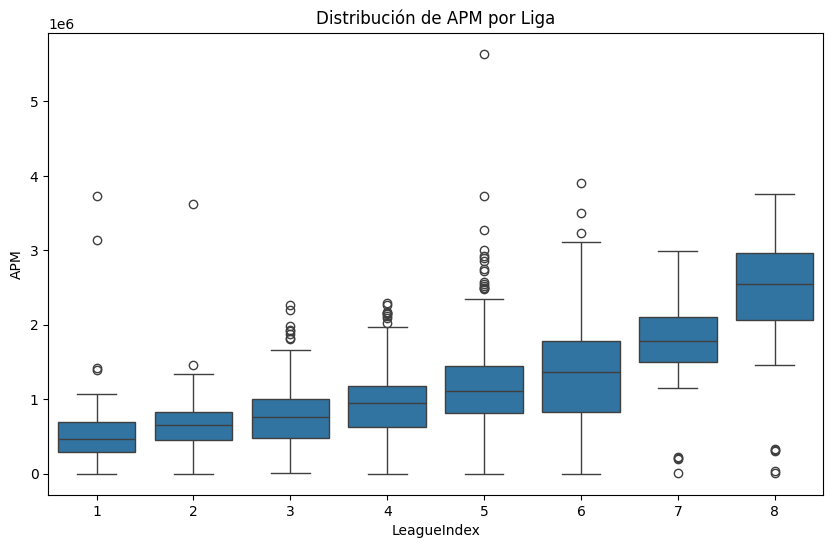

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeagueIndex', y='APM', data=df)
plt.title("Distribución de APM por Liga")
plt.show()

### Mientras mas alta la liga, mayor APM

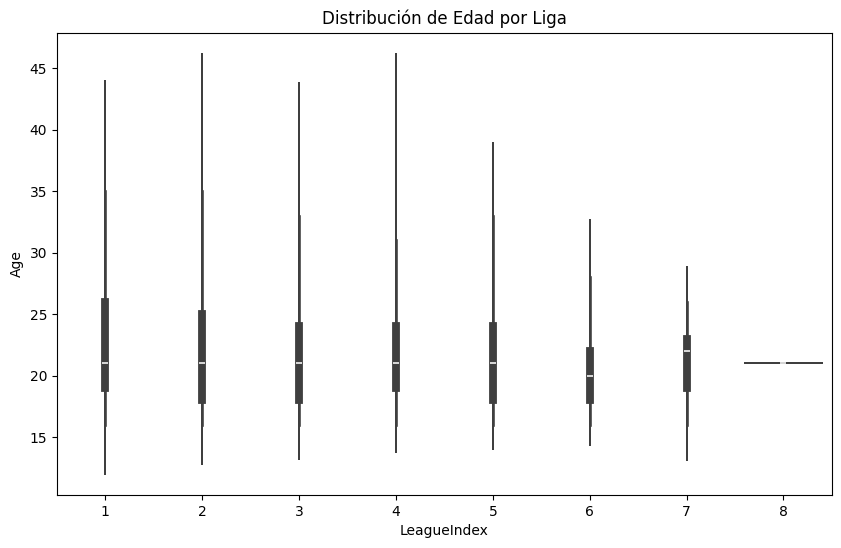

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='LeagueIndex', y='Age', data=df)
plt.title("Distribución de Edad por Liga")
plt.show()